░ ┌─┐
  q: ─░─┤M├
      ░ └╥┘
c: 1/════╩═
         0

Total counts: {'0': 1000}


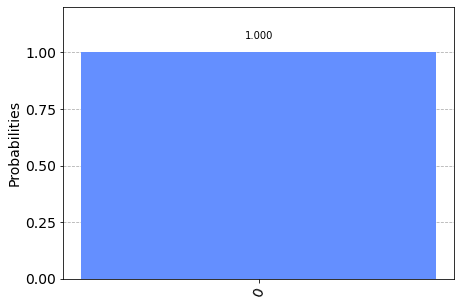

In [6]:
# Experiment 1
# %load ~cis492s/pub/BB84Test.py
import numpy as np
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)

# Alice encodes the qubit
qc.barrier()

# Bob receives the qubit and measures it

qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aersim = Aer.get_backend('aer_simulator')
job = aersim.run(assemble(qc),shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


┌───┐ ░ ┌───┐┌─┐┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘└───┘ ░ └───┘└╥┘
c: 1/══════════════╩═══════════════╩═
                   0               0

Total counts: {'0': 1000}


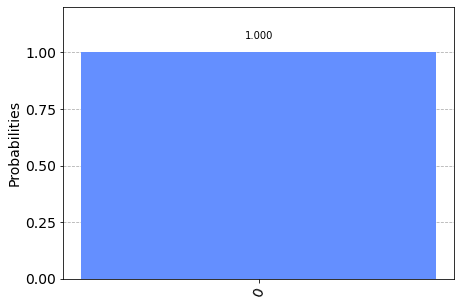

In [17]:
# Experiment 3
# %load ~cis492s/pub/BB84Test.py
import numpy as np
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)

# Alice encodes the qubit
qc.h(0)
qc.barrier()
qc.h(0)
# Bob receives the qubit and measures it
qc.measure(0,0)

qc.h(0)
qc.barrier()
qc.h(0)

qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aersim = Aer.get_backend('aer_simulator')
job = aersim.run(assemble(qc),shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


┌───┐ ░ ┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤M├─░─┤ H ├┤M├
     └───┘ ░ └╥┘ ░ └───┘└╥┘
c: 1/═════════╩══════════╩═
              0          0

Total counts: {'0': 487, '1': 513}


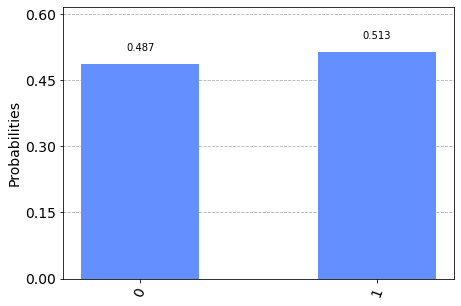

In [18]:
# Experiment 3
# %load ~cis492s/pub/BB84Test.py
import numpy as np
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)

# Alice encodes the qubit
qc.h(0)
qc.barrier()

# Bob receives the qubit and measures it
qc.measure(0,0)

qc.barrier()
qc.h(0)

qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aersim = Aer.get_backend('aer_simulator')
job = aersim.run(assemble(qc),shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

Total counts: {'0': 1000}


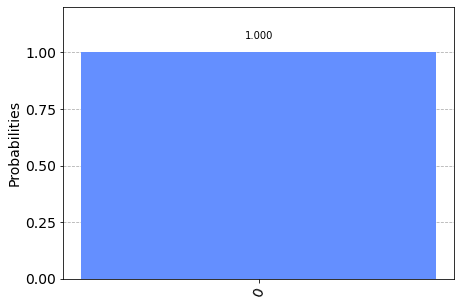

In [5]:
# Experiment 1
# %load ~cis492s/pub/BB84Test.py
import numpy as np
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)

# Alice encodes the qubit
qc.h(0)
qc.barrier()
qc.h(0)

# Bob receives the qubit and measures it

qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aersim = Aer.get_backend('aer_simulator')
job = aersim.run(assemble(qc),shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


In [15]:
# Experiment 2
# %load ~cis492s/pub/BB84.py
## original code from https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html
## modified based on Bernhardt's book page 53

from numpy.random import randint
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


## for display
from IPython.display import display

np.random.seed(seed=23)
n = 1000
four_times_n = 4 * n

def encode_message(bits, bases):
    message = []
    for i in range(four_times_n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 'V': # Prepare qubit in V direction (i.e. Z-basis) 
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: # Prepare qubit in H direction (i.e. X-basis)
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(four_times_n):
        if bases[q] == 'V': # measuring in V direction 
            message[q].measure(0,0)
        else:               # measuring in H direction 
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def remove_garbage(a_bases, b_bases, bits):
    same_basis_bits = []
    for q in range(four_times_n):
        if a_bases[q] == b_bases[q]:
            # select the bit If both used the same basis
            same_basis_bits.append(bits[q])
    return same_basis_bits

## Step 1 
# Alice generates bits
alice_bits = list(randint(2, size=four_times_n))
print("Alice bits: \n", alice_bits)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
#alice_bases = list( map(lambda bit: 'V' if bit == 0 else 'H', randint(2, size=four_times_n)) )
dir = ['V','H']
alice_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
print("Alice bases: \n", alice_bases)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
print("Bob bases: \n", bob_bases)
bob_results = measure_message(message, bob_bases)
print("Bob results: \n", bob_results)

## Step 4
alice_bits_samebasis = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_bits_samebasis = remove_garbage(alice_bases, bob_bases, bob_results)
# print("Bob's same-basis bits :\n", bob_bits_samebasis)

## Step 5: The size of the bits which Alice and Bob use the same basis is roughly 2 * n. 
##         Textbook uses half of the bits to compare over the unencrypted line. 

sample_size = len(alice_bits_samebasis) // 2
alice_sample = alice_bits_samebasis[0:sample_size]
bob_sample = bob_bits_samebasis[0:sample_size]
print("sample size:", sample_size)
print("alice_sample = ", alice_sample)
print(" bob_sample = " , bob_sample)
print(bob_sample == alice_sample)

Alice bits: 
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1

Bob bases: 
 ['H', 'H', 'V', 'V', 'H', 'V', 'H', 'V', 'V', 'V', 'H', 'V', 'H', 'H', 'V', 'H', 'V', 'V', 'V', 'H', 'V', 'V', 'V', 'V', 'H', 'H', 'H', 'V', 'V', 'V', 'V', 'H', 'V', 'V', 'H', 'V', 'H', 'V', 'H', 'H', 'H', 'V', 'H', 'H', 'V', 'V', 'H', 'H', 'H', 'V', 'V', 'V', 'H', 'V', 'V', 'V', 'H', 'V', 'H', 'H', 'V', 'H', 'V', 'H', 'H', 'V', 'H', 'V', 'H', 'H', 'H', 'V', 'H', 'H', 'H', 'V', 'V', 'V', 'V', 'H', 'H', 'V', 'H', 'V', 'V', 'V', 'V', 'H', 'V', 'V', 'H', 'H', 'H', 'V', 'H', 'H', 'H', 'V', 'V', 'H', 'H', 'V', 'V', 'V', 'H', 'H', 'V', 'H', 'H', 'V', 'V', 'V', 'V', 'V', 'H', 'H', 'V', 'V', 'H', 'V', 'H', 'V', 'H', 'H', 'H', 'V', 'H', 'H', 'V', 'H', 'H', 'H', 'H', 'H', 'H', 'V', 'V', 'V', 'V', 'V', 'H', 'H', 'V', 'H', 'V', 'V', 'V', 'V', 'V', 'H', 'V', 'V', 'V', 'V', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'V', 'H', 'H', 'H', 'H', 'H', 'V', 'V', 'V', 'V', 'V', 'H', 'H', 'V', 'H', 'H', 'V', 'V', 'V', 'V', 'H', 'V', 'V', 'V', 'V', 'H', 'H', 'V', 'V', 'H', 'V', 'H', 'H', 'H', 'V', '

Bob results: 
 [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 